In [ ]:
'''
After having trained the GAN and saving the model,
we may use the generator standalone to get new mnist images.

for this, we'll need to load the saved model, in this case the h5 file,
and see what it outputs for different latent points

we'll also plot and save the generated images
'''

In [1]:
from keras.models import load_model
from numpy.random import randn
import matplotlib.pyplot as plt

In [2]:
def generate_latent_points(latent_dims, n_samples):

    X = randn(latent_dims * n_samples)
    X = X.reshape((n_samples, latent_dims))

    return X

In [4]:
def plot_gen(samples, n):

    for i in range(n * n):
        plt.subplot(n, n, 1+i)
        plt.axis('off')
        plt.imshow(samples[i,:,:,0], cmap = 'gray_r')
    plt.show()

1/1 [==============================] - 1s 884ms/step


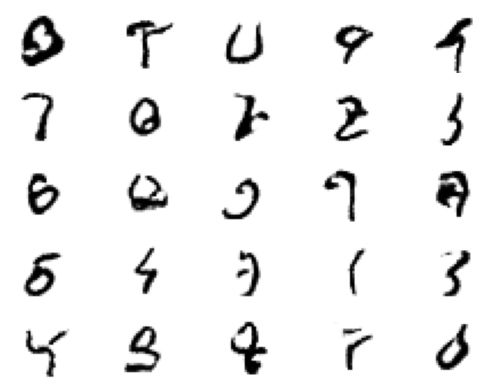

In [76]:
gen = load_model('path to h5')

latent_in = generate_latent_points(100, 25)

pred = gen.predict(latent_in)

plot_gen(pred, 5)

In [77]:
'''
in order to navigate this latent space,
i'll manually write down a list of 100 values between 0 and 1
when some value is changed, we'll gone from one point in the space
to a different one

you may just use the above function to get random values
'''
from numpy import asarray
values = asarray([
    0.139845784,
    0.148739283,
    0.174829101,
    0.112837492,
    0.189374829,
    0.127389473,
    0.148392837,
    0.138472938,
    0.183748293,
    0.147293748,
    0.729384723,
    0.893847289,
    0.382947329,
    0.838472938,
    0.927384729,
    0.837492384,
    0.283749284,
    0.993847293,
    0.748293847,
    0.927384729,
    0.473829384,
    0.293847293,
    0.394857483,
    0.839473829,
    0.993445684,
    0.502,
    0.498,
    0.503,
    0.497,
    0.501,
    0.499,
    0.504,
    0.496,
    0.505,
    0.495,
    0.5647,
    0.583749284,
    0.593748293,
    0.584738473,
    0.582739482,
    0.993847293,
    0.928374927,
    0.384729384,
    0.293847293,
    0.839473829,
    0.983749284,
    0.947293847,
    0.293847293,
    0.583749284,
    0.837492384,
    0.239847293,
    0.894728374,
    0.384729384,
    0.993847284,
    0.928374927,
    0.293847284,
    0.483749284,
    0.893748293,
    0.284738473,
    0.982739482,
    0.993847293,
    0.928374927,
    0.984729384,
    0.293847293,
    0.839473829,
    0.283749284,
    0.947293847,
    0.293847293,
    0.983749284,
    0.837492384,
    0.239847293,
    0.894728374,
    0.384729384,
    0.293847284,
    0.928374927,
    0.993847284,
    0.483749284,
    0.893748293,
    0.984738473,
    0.982739482,
    0.993847293,
    0.928374927,
    0.384729384,
    0.293847293,
    0.839473829,
    0.983749284,
    0.947293847,
    0.793847293,
    0.683749284,
    0.937492384,
    0.939847293,
    0.994728374,
    0.984729384,
    0.993847284,
    0.928374927,
    0.993847284,
    0.983749284,
    0.993748293,
    0.984738473,
    0.982739482,
])

values = values.reshape(1, 100)

In [78]:
values.shape

(1, 100)

1/1 [==============================] - 0s 28ms/step


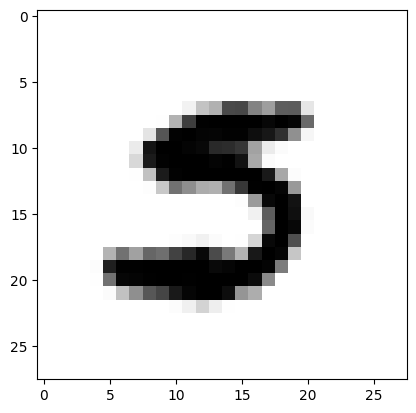

In [79]:
'''
now lets see the output for specific latent points
note that the model expects as input a vector, not an array of 100
'''
from numpy import asarray
z = values

z_pred = gen.predict(z)

plt.imshow(z_pred[0,:,:,0], cmap='gray_r')

In [ ]:
'''
above, i was able to navigate the space using the values vector,
to generate a plausible 5,

now, what's interesting is that if you change the first few values of the values vector,
it has a specific effect, in this case it makes the belly of the 5 more and more like a 5,

if you change the values near the end, it changes the neck of this 5

i could be wrong though but you get the point,
there are regions in this latent_space where the points map to very plausible outputs
'''

1/1 [==============================] - 1s 1s/step


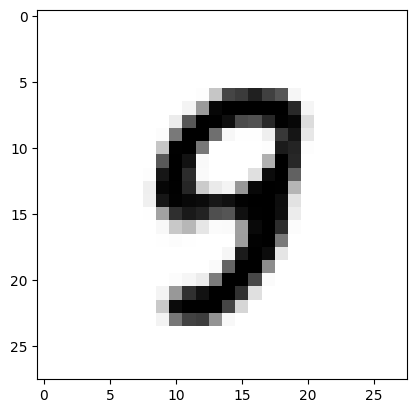

In [162]:
'''
lets try with vectors of all 100 same elements
imma seperate these values in 3 parts

head (0-30)
body (30-70)
tail (70-100)

now its easier to see what values change what
'''
from numpy import full
from numpy import concatenate

tail = full((1, 30), 0.0)
body = full((1, 50), 0.2)
head = full((1, 20), 0.0)

vector = concatenate((head, body, tail), axis=1)

z = gen.predict(vector)

plt.imshow(z[0,:,:,0], cmap='gray_r')

In [ ]:
'''
so the region near (0.3, 0.35, 0.8) maps to plausible 5's,
near (0,2,0) we get pretty good 9's


and for this region, the head, body and tail parts affect the top, middle and bottom parts of the generated image
that's not a coincidence i changed the variables name so they correspond to parts they affect ;-P

for points far from this region, the same is not true.
our points actually have 100 dimensions, they mean basically nothing themselves,
and its difficult to identify exactly what regions correspond to what digit

but the point is that now the model is able to map from any region to something looks like a digit
what points make what digits, is for us to see

or so i think
'''